# Creating the model

In [30]:
# Using best Hyperparameters
window_size = 10
lstm_units = [100, 100]
dense_units = [50]
dropout = 0

epochs = 50
batch_size = 8
set_early_stopping = True

In [31]:
# Imports
import pandas as pd
import numpy as np
import ml_utils as mlu
import warnings
warnings.filterwarnings('ignore')

In [32]:
# Loading Dataset
df = pd.read_csv("datasets/apple_2014-2024_fullSimpleFeatures.csv")
df = df.set_index(['date'])
df.index = pd.to_datetime(df.index)
df = df.sort_index()
df = df.dropna()

In [ ]:
# Completing the dates
df = df.reindex(pd.date_range(start=df.index.min(),
                              end=df.index.max(),
                              freq='D'))
df = df.fillna(method='ffill')
df['week_day'] = df.index.day_name()
df['week_day_num'] = df.index.dayofweek
df['weekday_sin'] = np.sin(2 * np.pi * df['week_day_num'] / 7)
df['weekday_cos'] = np.cos(2 * np.pi * df['week_day_num'] / 7)
#df.head(10)

,Adj Close,Close,High,Low,Open,Volume,last_close,delta_close,direction,RSI_14,...,BBU_20_2.0,BBL_20_2.0,momentum_10,ATR_14,week_day,next_close,next_delta_close,week_day_num,weekday_sin,weekday_cos
2014-10-01,21.991468,24.795000,25.172501,24.674999,25.147499,205965200.0,25.187500,-0.392500,0.0,46.651184,...,25.822231,24.389269,-0.600000,0.506992,Wednesday,24.975000,0.180000,2,0.974928,-0.222521
2014-10-02,22.151114,24.975000,25.055000,24.510000,24.817499,191031200.0,24.795000,0.180000,1.0,49.168628,...,25.797691,24.458309,-0.472500,0.509708,Thursday,24.905001,-0.070000,3,0.433884,-0.900969
2014-10-03,22.089029,24.905001,25.052500,24.760000,24.860001,173878400.0,24.975000,-0.070000,0.0,48.215762,...,25.790683,24.481567,-0.334999,0.494185,Friday,24.905001,0.000000,4,-0.433884,-0.900969
2014-10-04,22.089029,24.905001,25.052500,24.760000,24.860001,173878400.0,24.975000,-0.070000,0.0,48.215762,...,25.790683,24.481567,-0.334999,0.494185,Saturday,24.905001,0.000000,5,-0.974928,-0.222521
2014-10-05,22.089029,24.905001,25.052500,24.760000,24.860001,173878400.0,24.975000,-0.070000,0.0,48.215762,...,25.790683,24.481567,-0.334999,0.494185,Sunday,24.905001,0.000000,6,-0.781831,0.623490
2014-10-06,22.089029,24.905001,25.162500,24.855000,24.987499,148204800.0,24.905001,0.000000,1.0,48.215762,...,25.767088,24.536662,-0.359999,0.480843,Monday,24.687500,-0.217501,0,0.000000,1.000000
2014-10-07,21.896118,24.687500,25.030001,24.682501,24.857500,168376800.0,24.905001,-0.217501,0.0,45.068381,...,25.740697,24.582054,-0.972500,0.471314,Tuesday,25.200001,0.512501,1,0.781831,0.623490
2014-10-08,22.350672,25.200001,25.277500,24.577499,24.690001,229618800.0,24.687500,0.512501,1.0,52.874495,...,25.737076,24.580675,-0.237499,0.487656,Wednesday,25.254999,0.054998,2,0.974928,-0.222521
2014-10-09,22.399458,25.254999,25.594999,25.152500,25.385000,309506000.0,25.200001,0.054998,1.0,53.635932,...,25.726610,24.580890,0.787498,0.484429,Thursday,25.182501,-0.072498,3,0.433884,-0.900969
2014-10-10,22.335150,25.182501,25.507500,25.075001,25.172501,265326400.0,25.254999,-0.072498,0.0,52.433259,...,25.702610,24.581641,-0.004999,0.480719,Friday,24.952499,-0.230001,4,-0.433884,-0.900969


In [ ]:
df['']

In [34]:
# Selecting Features
target = df[['Close']]
input = df[['Close', 'weekday_sin', 'weekday_cos']]

# input = df[['last_close', 'RSI_14', 'SMA_5', 'SMA_10', 'SMA_20',
#        'SMA_50', 'SMA_100', 'EMA_20', 'EMA_50', 'EMA_100', 'MACD',
#        'MACD_Signal', 'BBU_20_2.0', 'BBL_20_2.0', 'momentum_10', 'ATR_14', 'week_day_num']]

Epoch 1/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 0.0137 - val_loss: 0.0035
Epoch 2/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 9.0461e-04 - val_loss: 0.0172
Epoch 3/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 7.8493e-04 - val_loss: 0.0108
Epoch 4/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 8.6301e-04 - val_loss: 0.0083
Epoch 5/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 6.1953e-04 - val_loss: 0.0015
Epoch 6/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 6.1576e-04 - val_loss: 0.0026
Epoch 7/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 5.6606e-04 - val_loss: 9.7271e-04
Epoch 8/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 4.5598e-04 - val_loss: 0.0018
Epoch 9/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 4.0922e-04 - val_loss: 0.0028
Epoch 10/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 3.9451e-04 - val_loss: 7.1220e-04
Epoch 11/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 5.0046e-04 - val_loss: 0.0025
Epo

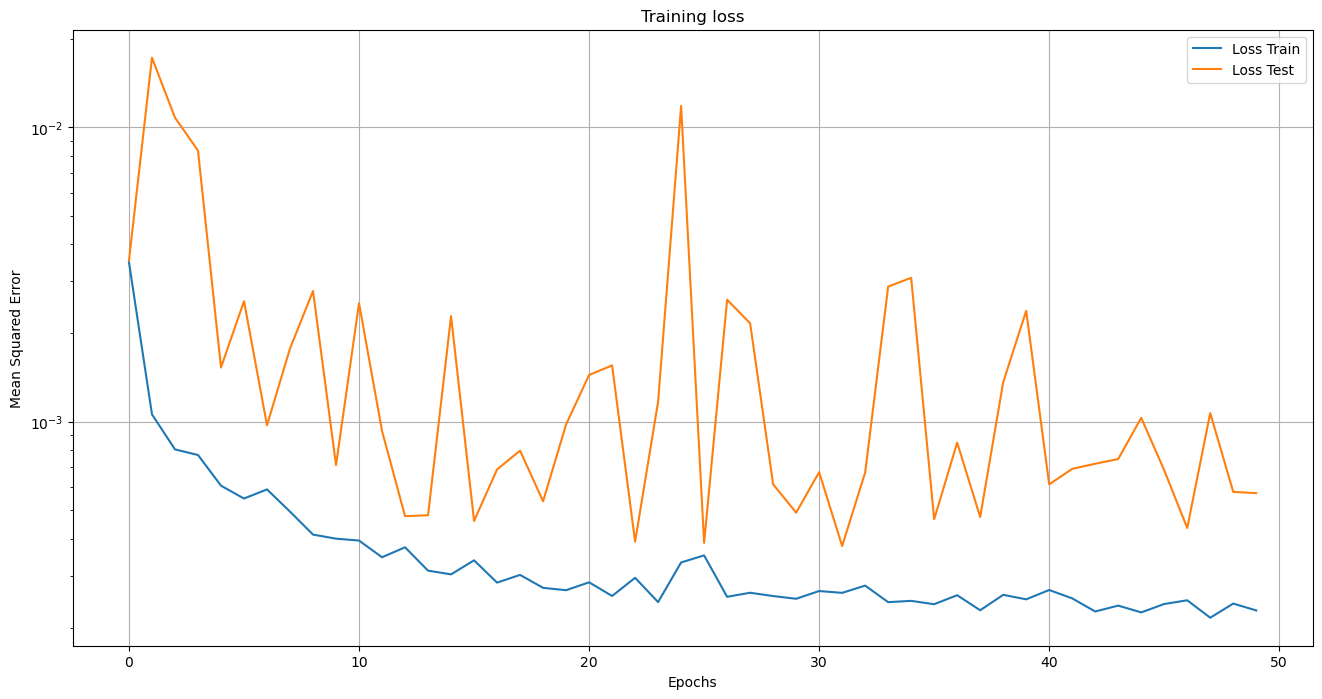

Train-Set Score
MAE: 2.4173
RMSE: 3.8904
MAPE (%): 3.2162
R²: 0.9936

Test-Set Score
MAE: 1.5308
RMSE: 2.2433
MAPE (%): 0.8094
R²: 0.9940


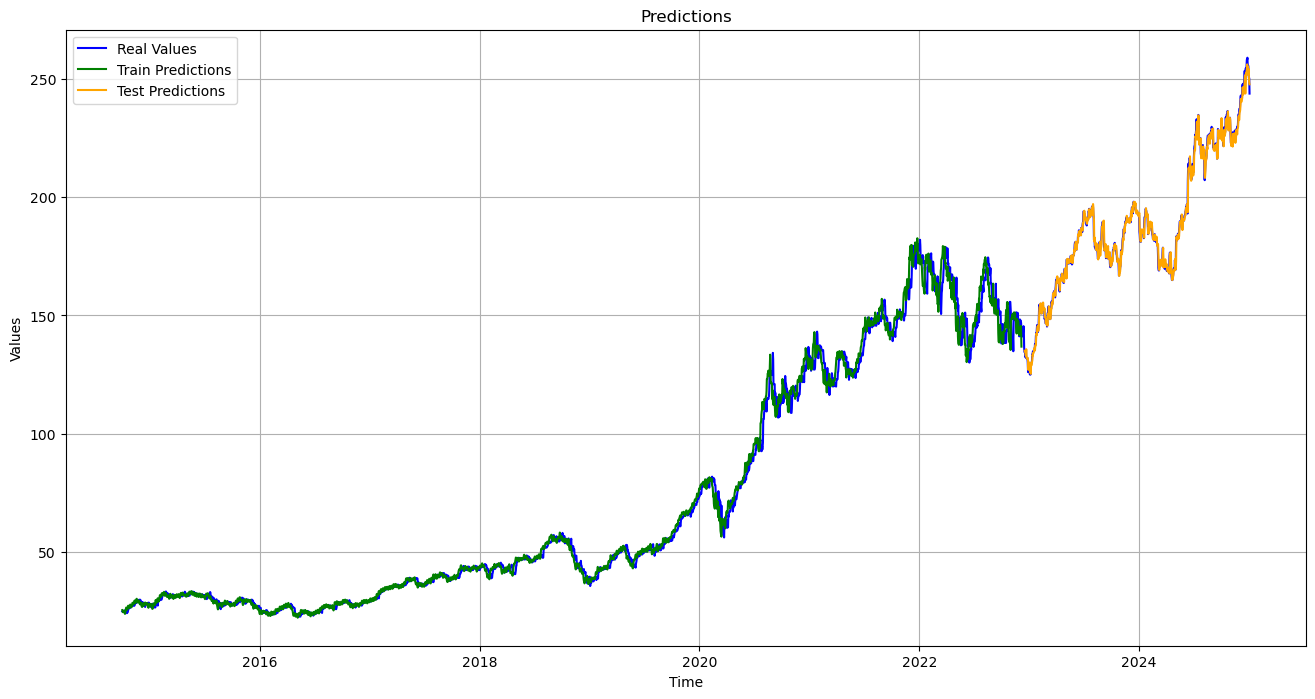

In [35]:
# Preparing Data
data_scaler = mlu.Data_Robust_Scaler(input, target)
scaled_input, scaled_target = data_scaler.get_scaled_data()
X_train, X_test, y_train, y_test, input_size, train_size = mlu.train_test_split_timeWindows(scaled_input,
                                                                                            scaled_target,
                                                                                            window_size=window_size,
                                                                                            train_size_pct=0.8)

# Creating Model
model2 = mlu.LSTMModel(input_shape=input_size,
                       lstm_units=lstm_units,
                       dense_units=dense_units,
                       dropout=dropout)

# Training Model
model2.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    set_early_stopping=set_early_stopping,
    validation_data=(X_test, y_test)
)

# Making Predictions
y_train_pred = model2.predict(X_train)
y_test_pred = model2.predict(X_test)

# Printing Results
model2.plot_loss()
data_scaler.get_dataframe_results(y_train_pred, y_test_pred, train_size, window_size=window_size)
data_scaler.print_scores()
data_scaler.plot_results()

# FORECASTS TESTS

In [ ]:
# Preparing forecast dataframe
test_results = data_scaler.test_results
test_results['forecast'] = pd.NA
test_results

,Close,pred,forecast
2022-12-17,134.509995,135.093460,NaN
2022-12-18,134.509995,134.730057,NaN
2022-12-19,132.369995,134.707642,NaN
2022-12-20,132.300003,133.069290,NaN
2022-12-21,135.449997,133.102142,NaN
...,...,...,...
2024-12-29,255.589996,253.901901,NaN
2024-12-30,252.199997,254.329163,NaN
2024-12-31,250.419998,250.647354,NaN
2025-01-01,250.419998,248.522018,NaN


In [60]:
# Preparing forecast parameters
initial_window = X_test[0][:window_size].reshape(1, 10, 3)
forecast_window = len(test_results) - 1

In [62]:
X_test.shape

(748, 10, 3)

In [61]:
initial_window.shape

(1, 10, 3)

In [96]:
initial_window

array([[[ 6.82608687e-01,  6.23489802e-01,  0.00000000e+00],
        [ 6.97430972e-01,  2.77479066e-01, -4.45041868e-01],
        [ 6.93183714e-01, -2.77479066e-01, -4.45041868e-01],
        [ 6.93183714e-01, -6.23489802e-01, -1.63861563e-16],
        [ 6.93183714e-01, -5.00000000e-01,  5.54958132e-01],
        [ 7.13380278e-01,  0.00000000e+00,  8.01937736e-01],
        [ 7.21874927e-01,  5.00000000e-01,  5.54958132e-01],
        [ 7.02285189e-01,  6.23489802e-01,  0.00000000e+00],
        [ 6.44122540e-01,  2.77479066e-01, -4.45041868e-01],
        [ 6.26873080e-01, -2.77479066e-01, -4.45041868e-01]]])

In [68]:
pred1 = model2.predict(initial_window)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


In [69]:
pred1

array([0.63193053], dtype=float32)

In [104]:
def next_weekday_encoding(sin_val, cos_val):
    # Calcola l'angolo corrente (in radianti)
    angle = np.arctan2(sin_val, cos_val)
    # Incrementa l'angolo di 2π / 7 per passare al giorno successivo
    next_angle = angle + (2 * np.pi / 7)
    # Normalizza l'angolo tra -π e π
    next_angle = (next_angle + np.pi) % (2 * np.pi) - np.pi
    # Calcola la nuova coppia sin e cos
    next_sin = np.sin(next_angle)
    next_cos = np.cos(next_angle)
    return next_sin, next_cos

In [136]:
WEEKDAY_ENCODINGS = [
    (np.sin(2 * np.pi * i / 7), np.cos(2 * np.pi * i / 7))
    for i in range(7)
]

def next_weekday_encoding_by_lookup(sin_val, cos_val, tol=1e-6):
    for i, (s, c) in enumerate(WEEKDAY_ENCODINGS):
        if np.isclose(sin_val, s, atol=tol) and np.isclose(cos_val, c, atol=tol):
            next_index = (i + 1) % 7  # torna a lunedì dopo domenica
            return WEEKDAY_ENCODINGS[next_index]
    raise ValueError("Coppia (sin, cos) non riconosciuta come giorno valido.")

In [137]:
WEEKDAY_ENCODINGS

[(0.0, 1.0),
 (0.7818314824680298, 0.6234898018587336),
 (0.9749279121818236, -0.22252093395631434),
 (0.43388373911755823, -0.900968867902419),
 (-0.433883739117558, -0.9009688679024191),
 (-0.9749279121818236, -0.2225209339563146),
 (-0.7818314824680299, 0.6234898018587334)]

In [138]:
def forecast_autoregressive_circularDayEncription(model, initial_window, n_steps):
    window = initial_window
    predictions = []

    for _ in range(n_steps):
        next_pred = model.predict(window)[0] #Single prediction
        print(window[0][-1][1], window[0][-1][2])
        next_sin, next_cos = next_weekday_encoding_by_lookup(window[0][-1][1], window[0][-1][2])
        new_elem = [next_pred[0], next_sin, next_cos]
        # print(new_elem)
        # print(next_pred)
        # print(next_pred.shape)
        predictions.append(next_pred)
        
        temp = np.array(window[0][1:])
        # print(temp.shape)
        window[0] = np.append(temp, new_elem).reshape(temp.shape[0]+1, temp.shape[1])

    return np.array(predictions)

In [139]:
# Forecasting
forecast = forecast_autoregressive_circularDayEncription(model2, initial_window, forecast_window)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
0.9450289767783658 -0.32698659460172813


ValueError: Coppia (sin, cos) non riconosciuta come giorno valido.

In [119]:
rescaled_forecast = data_scaler.inverse_scale_output(forecast)

In [120]:
test_results['forecast'].iloc[:len(rescaled_forecast)] = rescaled_forecast.reshape(len(rescaled_forecast),)

In [121]:
test_results

,Close,pred,forecast
2022-12-17,134.509995,135.093460,135.09346
2022-12-18,134.509995,134.730057,134.64772
2022-12-19,132.369995,134.707642,134.739075
2022-12-20,132.300003,133.069290,135.394119
2022-12-21,135.449997,133.102142,136.231674
...,...,...,...
2024-12-29,255.589996,253.901901,215.182465
2024-12-30,252.199997,254.329163,216.599869
2024-12-31,250.419998,250.647354,218.13063
2025-01-01,250.419998,248.522018,218.541962


In [126]:
mlu.model_scores(test_results['Close'].iloc[:20], test_results['forecast'].iloc[:20])

MAE: 6.7500
RMSE: 8.1291
MAPE (%): 5.2513
R²: -6.6560


{'MAE': 6.7500041961669925,
 'RMSE': 8.129081033701238,
 'MAPE (%)': 5.251338825734243,
 'R²': -6.6559887243361535}

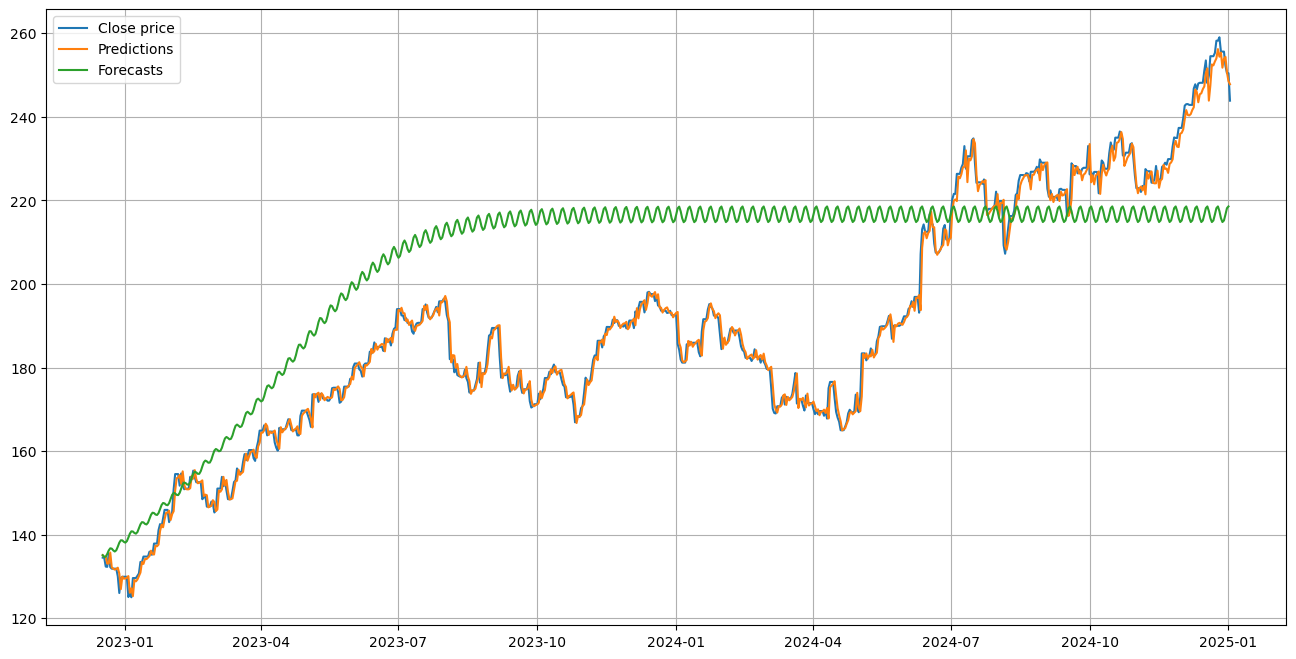

In [124]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(test_results['Close'], label='Close price')
plt.plot(test_results['pred'], label='Predictions')
plt.plot(test_results['forecast'][test_results['forecast'].notna()], label='Forecasts')
plt.grid(True)
plt.legend()
plt.show()